In [1]:
from postprocessing import *

In [2]:
simulation_directory = str('/n/holyscratch01/hernquist_lab/borodina/turb_drive_cooling/turb')
output_directory = simulation_directory+"/output/"
figures_directory = simulation_directory + "/output/figures/"

In [3]:
mpl.rcParams['figure.dpi']= 300

In [6]:
t_bins = np.linspace(3.3, 10.2, 201)

In [5]:
################## 1
i_file = 1
filename = "snap_%03d.hdf5" % (i_file)
snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')

time_1 = get_time_from_snap(snapshot)
masses_1 = snapshot['PartType0/Masses'][:]
temperatures_1 = get_temp(output_directory + filename, 5/3)


################## 5
i_file = 5
filename = "snap_%03d.hdf5" % (i_file)
snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')

time_5 = get_time_from_snap(snapshot)
masses_5 = snapshot['PartType0/Masses'][:]
temperatures_5 = get_temp(output_directory + filename, 5/3)


################## 9
i_file = 9
filename = "snap_%03d.hdf5" % (i_file)
snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')

time_9 = get_time_from_snap(snapshot)
masses_9 = snapshot['PartType0/Masses'][:]
densities_9 = snapshot['PartType0/Density'][:]
temperatures_9 = get_temp(output_directory + filename, 5/3)


In [7]:
masses_1.sum() / 1e8

3.4589382789951273

Text(0.5, 0, 'log T [K]')

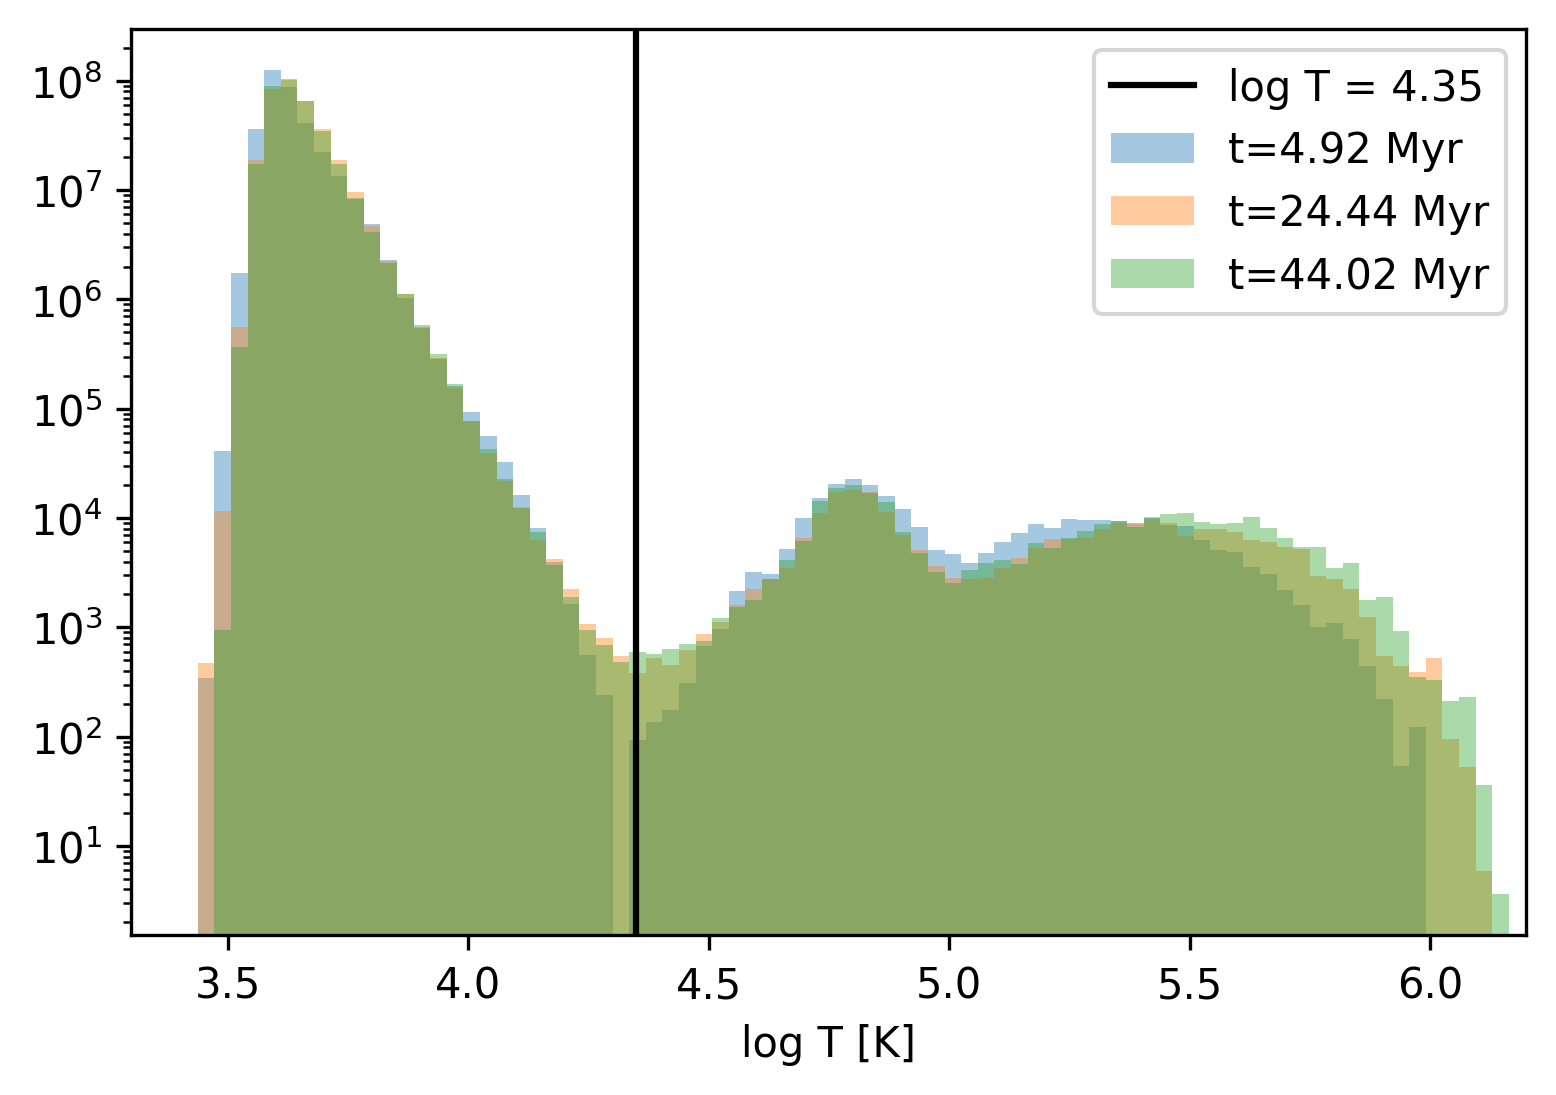

In [8]:
plt.hist(np.log10(temperatures_1), weights=masses_1, density=False, 
         bins=t_bins, alpha=0.4, label="t=%.2f Myr"%(time_1 * unit_time_in_megayr))
plt.hist(np.log10(temperatures_5), weights=masses_5, density=False, 
         bins=t_bins, alpha=0.4, label="t=%.2f Myr"%(time_5 * unit_time_in_megayr))
plt.hist(np.log10(temperatures_9), weights=masses_9, density=False, 
         bins=t_bins, alpha=0.4, label="t=%.2f Myr"%(time_9 * unit_time_in_megayr))
plt.axvline(4.35, c='black', label='log T = 4.35')
plt.legend()
plt.xlim(3.3, 6.2)
plt.yscale('log')
plt.xlabel("log T [K]")

In [9]:
simulation_directory = str('/n/holyscratch01/hernquist_lab/borodina/turb_drive_cooling/jet')
output_directory = simulation_directory+"/output/"
figures_directory = simulation_directory + "/output/figures/"

In [10]:
################## 3
i_file = 3
filename = "snap_%03d.hdf5" % (i_file)
snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')

time_3 = get_time_from_snap(snapshot)
masses_3 = snapshot['PartType0/Masses'][:]
densities_3 = snapshot['PartType0/Density'][:]
temperatures_3 = get_temp(output_directory + filename, 5/3)


################## 5
i_file = 5
filename = "snap_%03d.hdf5" % (i_file)
snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')

time_5 = get_time_from_snap(snapshot)
masses_5 = snapshot['PartType0/Masses'][:]
densities_5 = snapshot['PartType0/Density'][:]
temperatures_5 = get_temp(output_directory + filename, 5/3)


################## 20
i_file = 20
filename = "snap_%03d.hdf5" % (i_file)
snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')

time_20 = get_time_from_snap(snapshot)
masses_20 = snapshot['PartType0/Masses'][:]
densities_20 = snapshot['PartType0/Density'][:]
temperatures_20 = get_temp(output_directory + filename, 5/3)

In [11]:
snapshot['PartType5/Masses'][:]

array([61377.3595403])

In [12]:
masses_20.sum() - masses_9.sum()

-61376.3595405817

Text(0.5, 0, 'log T [K]')

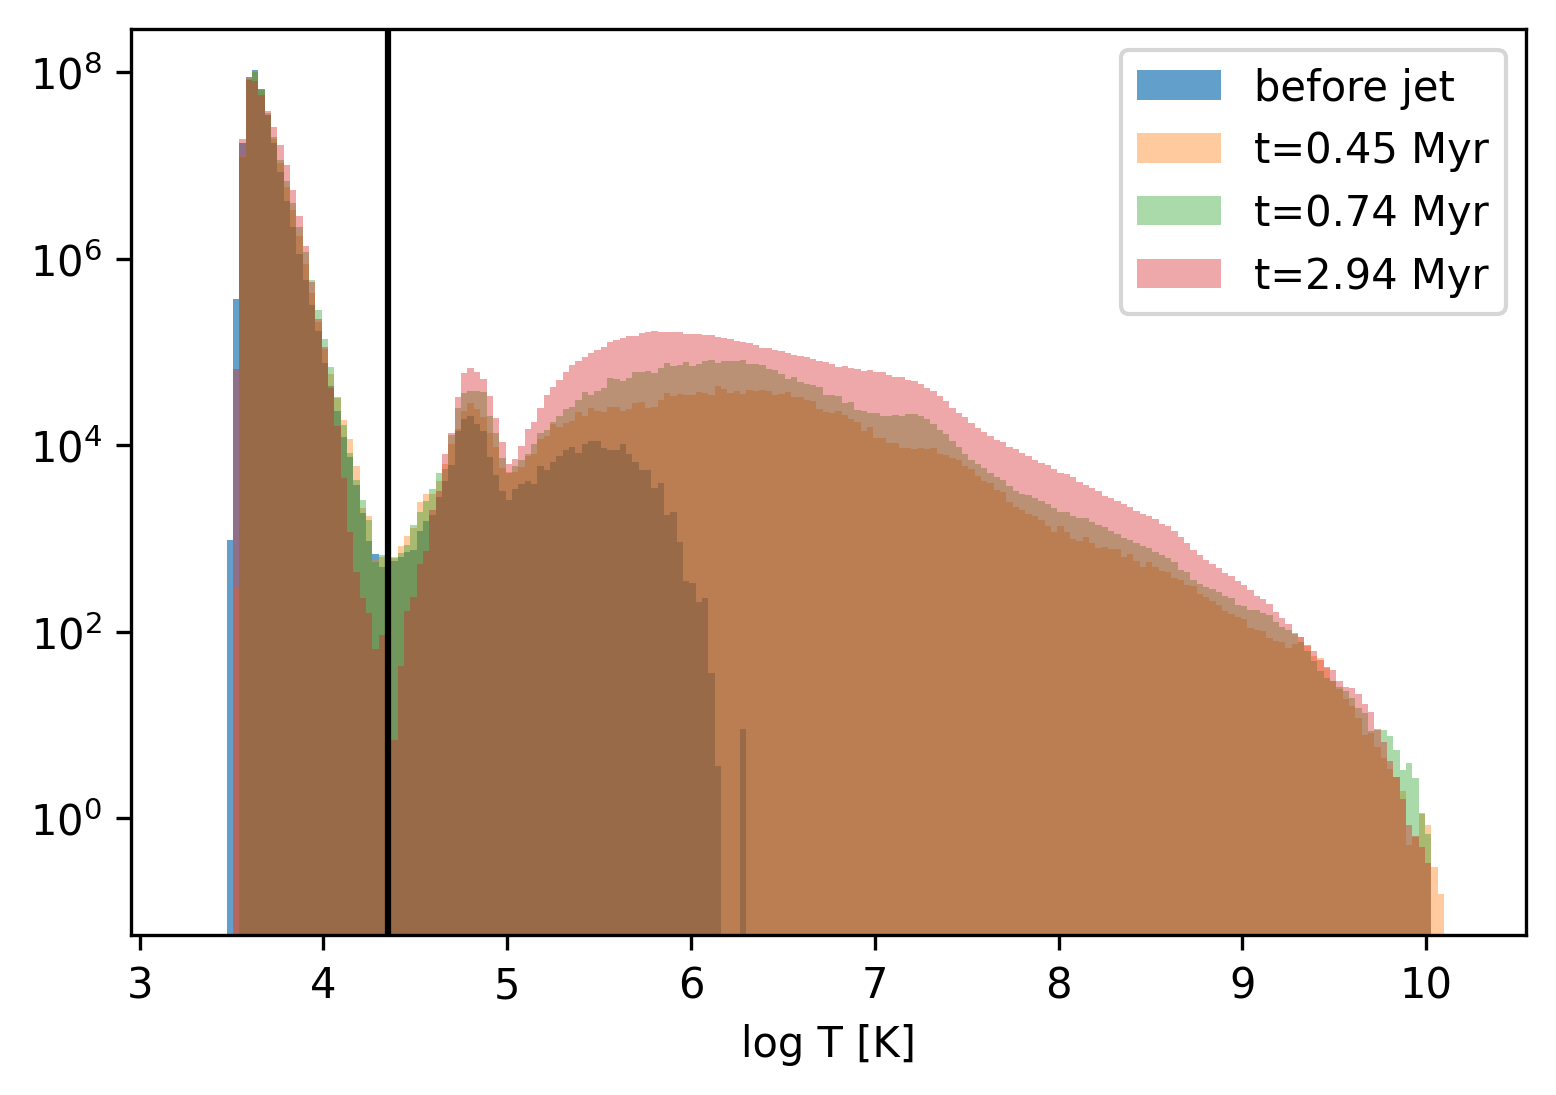

In [13]:
plt.hist(np.log10(temperatures_9), weights=masses_9, density=False, bins=t_bins, alpha=0.7, label="before jet")
plt.hist(np.log10(temperatures_3), weights=masses_3, density=False, 
         bins=t_bins, alpha=0.4, label="t=%.2f Myr"%(time_3 * unit_time_in_megayr))
plt.hist(np.log10(temperatures_5), weights=masses_5, density=False, 
         bins=t_bins, alpha=0.4, label="t=%.2f Myr"%(time_5 * unit_time_in_megayr))
plt.hist(np.log10(temperatures_20), weights=masses_20, density=False, 
         bins=t_bins, alpha=0.4, label="t=%.2f Myr"%(time_20 * unit_time_in_megayr))

plt.legend()
plt.axvline(4.35, c='black', label='log T = 4.35')
plt.yscale('log')
plt.xlabel("log T [K]")

Text(0, 0.5, 'log T')

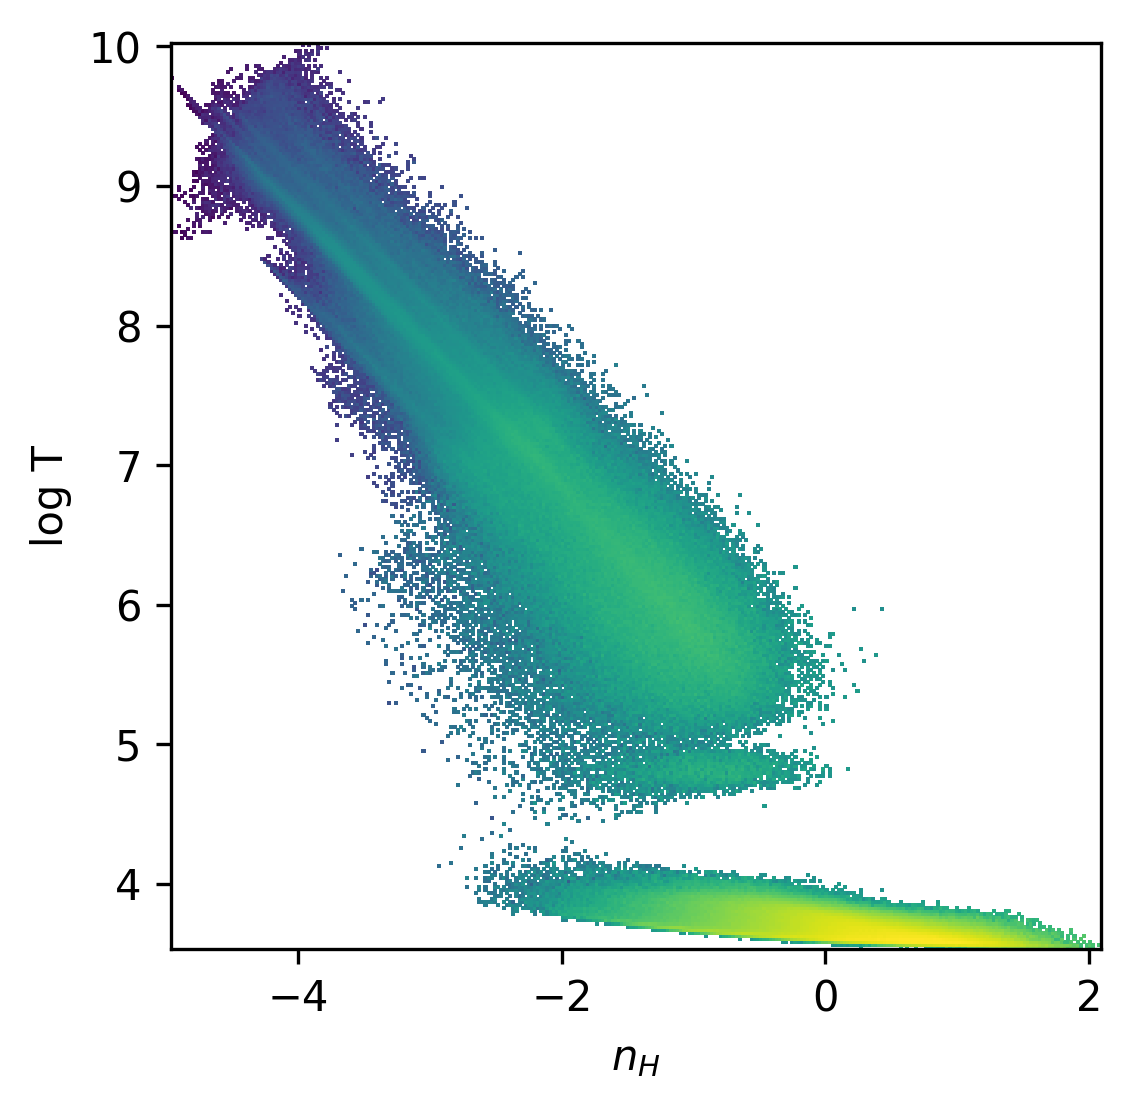

In [14]:
fig, ax = plt.subplots(figsize=(4,4))
ax.hist2d(np.log10(densities_20), np.log10(temperatures_20), weights=masses_20 ,bins=300, density=True, norm=mpl.colors.LogNorm())
ax.set_xlabel(r'$n_H$')
ax.set_ylabel('log T')